# Students’ Academic Performance Prediction using Data Mining 

#### Import libraries

In [2]:
import numpy as np # linear algebra
import csv
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

#### Labels According to G3 - final grade

The others (0–9, 9–15, and 15–20) correspond to  C (poor), B (average), and A (good) class labels, respectively.

####   Dataset Pre-processing

In [9]:
data_path1 = 'D:/CodeEarn/SP Research/student-por.csv'
data_path2 = 'D:/CodeEarn/SP Research/student-mat.csv'

In [10]:
rows = []
with open(data_path1) as infile:
    count=0
    # Create a new reader
    reader = csv.reader(infile) 
    #next(reader) # Skip the first row
    for row in reader:
        row_1=[i.replace("\"", "") for i in row[0].split(";")]       
        if(count!=0):
            target=int(row_1[32])
            if(0<=target<9):
                row_1[32]="C"
            elif(9<=target<15):
                row_1[32]="B"
            else:
                row_1[32]="A"
        rows.append(row_1)
        count=1



In [11]:
with open(data_path2) as infile:
    count=0
    # Create a new reader
    reader = csv.reader(infile) 
    #next(reader) # Skip the first row
    for row in reader:
        row_1=[i.replace("\"", "") for i in row[0].split(";")]       
        if(count!=0):
            target=int(row_1[32])
            if(0<=target<9):
                row_1[32]="C"
            elif(9<=target<15):
                row_1[32]="B"
            else:
                row_1[32]="A"
        rows.append(row_1)
        count=1

In [12]:
a = np.array(rows)
with open('formatted_data.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(a)

#### Import dataset

In [13]:
df = pd.read_csv('formatted_data.csv')


#### Exploratory data analysis 

In [14]:
# view dimensions of dataset
df.shape

(1045, 33)

In [15]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,B


#### Missing values in variables

In [16]:
# check missing values in variables
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

####  Declare feature vector and target variable

In [17]:
X = df.drop(['G3'], axis=1)
y = df['G3']

#### Split data into separate training and test set

In [18]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((783, 32), (262, 32))

##### Data scaling 

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

##### Feature Importance Techniques

###### --Using logistic regression and coefficient

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

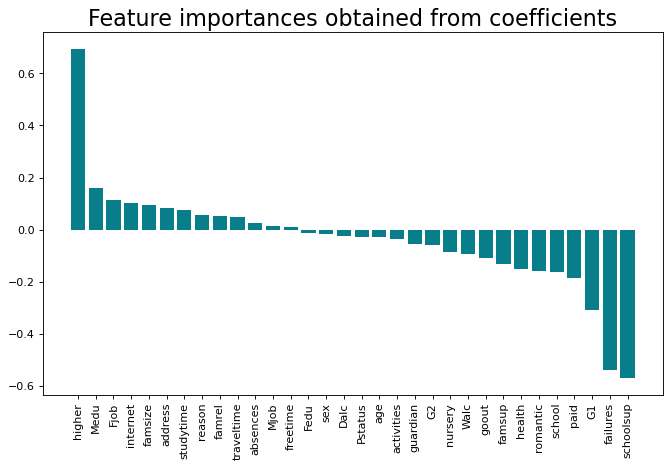

In [27]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
# lable encoding part,
# can not use lable in string for this 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

##### --Using XG Boost Classifire

In [29]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

###### ***Visualization of XG Boost Classifire - 01

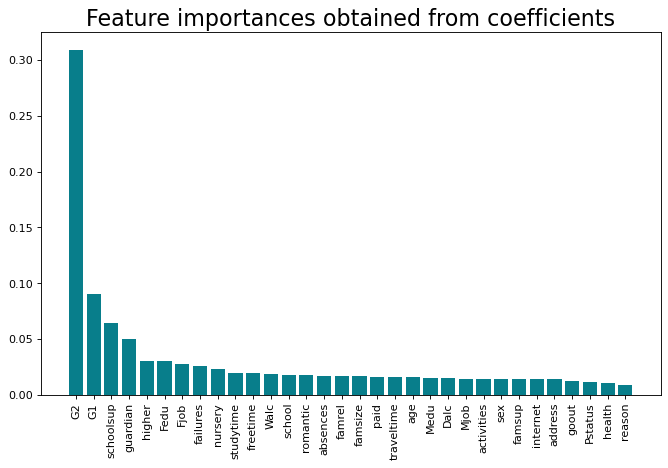

In [30]:
plt.figure(figsize=(10, 6), dpi=80)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

###### ***Visualization of XG Boost Classifire - 02

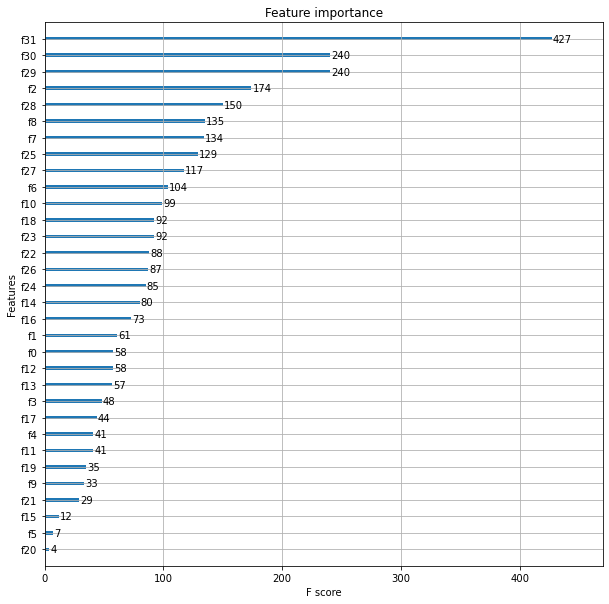

In [41]:
from xgboost import plot_importance
from matplotlib import pyplot
from matplotlib.pyplot import figure

# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 10)

In [52]:
# used to check the table easily
n = -1
for col in df.columns:
    n = n + 1
    print('f'+str(n)+ ' -> '+col)

f0 -> school
f1 -> sex
f2 -> age
f3 -> address
f4 -> famsize
f5 -> Pstatus
f6 -> Medu
f7 -> Fedu
f8 -> Mjob
f9 -> Fjob
f10 -> reason
f11 -> guardian
f12 -> traveltime
f13 -> studytime
f14 -> failures
f15 -> schoolsup
f16 -> famsup
f17 -> paid
f18 -> activities
f19 -> nursery
f20 -> higher
f21 -> internet
f22 -> romantic
f23 -> famrel
f24 -> freetime
f25 -> goout
f26 -> Dalc
f27 -> Walc
f28 -> health
f29 -> absences
f30 -> G1
f31 -> G2
f32 -> G3


Here, XG Boost Classifire is used for the feature importance finding purpose. Caluculating coefficiens and built in method using results are almost same.  

In [53]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,B


In [56]:
df_new = df.drop(['address', 'paid', 'famsize', 'guardian', 'nursery', 'Fjob', 'internet', 'schoolsup', 'Pstatus', 'higher' ], axis = 1)

In [57]:
df_new

,school,sex,age,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,4,4,at_home,course,2,2,0,...,4,3,4,1,1,3,4,0,11,B
1,GP,F,17,1,1,at_home,course,1,2,0,...,5,3,3,1,1,3,2,9,11,B
2,GP,F,15,1,1,at_home,other,1,2,0,...,4,3,2,2,3,3,6,12,13,B
3,GP,F,15,4,2,health,home,1,3,0,...,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,3,3,other,home,1,2,0,...,4,3,2,1,2,5,0,11,13,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,MS,M,20,2,2,services,course,1,2,2,...,5,5,4,4,5,4,11,9,9,B
1041,MS,M,17,3,1,services,course,2,1,0,...,2,4,5,3,4,2,3,14,16,A
1042,MS,M,21,1,1,other,course,1,1,3,...,5,5,3,3,3,3,3,10,8,C
1043,MS,M,18,3,2,services,course,3,1,0,...,4,4,1,3,4,5,0,11,12,B


In [91]:
# df_new[['school', 'sex']] = df[['school', 'sex']].apply(le.fit_transform)
# df_new[['school']]

,school
0,0
1,0
2,0
3,0
4,0
...,...
1040,1
1041,1
1042,1
1043,1


In [92]:
# df_new[['sex']]

,sex
0,0
1,0
2,0
3,0
4,0
...,...
1040,1
1041,1
1042,1
1043,1


In [83]:
#define X and Y for new data frame
# X_new = df_new.drop(['G3'], axis=1)
# y_new = df_new['G3']

In [89]:
# df_new

,school,sex,age,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,F,18,4,4,at_home,course,2,2,0,...,4,3,4,1,1,3,4,0,11,B
1,0,F,17,1,1,at_home,course,1,2,0,...,5,3,3,1,1,3,2,9,11,B
2,0,F,15,1,1,at_home,other,1,2,0,...,4,3,2,2,3,3,6,12,13,B
3,0,F,15,4,2,health,home,1,3,0,...,3,2,2,1,1,5,0,14,14,B
4,0,F,16,3,3,other,home,1,2,0,...,4,3,2,1,2,5,0,11,13,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1,M,20,2,2,services,course,1,2,2,...,5,5,4,4,5,4,11,9,9,B
1041,1,M,17,3,1,services,course,2,1,0,...,2,4,5,3,4,2,3,14,16,A
1042,1,M,21,1,1,other,course,1,1,3,...,5,5,3,3,3,3,3,10,8,C
1043,1,M,18,3,2,services,course,3,1,0,...,4,4,1,3,4,5,0,11,12,B


In [84]:
# X_new, y_new

(      school sex age Medu Fedu      Mjob  reason traveltime studytime  \
 0          0   F  18    4    4   at_home  course          2         2   
 1          0   F  17    1    1   at_home  course          1         2   
 2          0   F  15    1    1   at_home   other          1         2   
 3          0   F  15    4    2    health    home          1         3   
 4          0   F  16    3    3     other    home          1         2   
 ...      ...  ..  ..  ...  ...       ...     ...        ...       ...   
 1040       1   M  20    2    2  services  course          1         2   
 1041       1   M  17    3    1  services  course          2         1   
 1042       1   M  21    1    1     other  course          1         1   
 1043       1   M  18    3    2  services  course          3         1   
 1044       1   M  19    1    1     other  course          1         1   
 
      failures  ... romantic famrel freetime goout Dalc Walc health absences  \
 0           0  ...       no  

In [85]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.25, random_state = 42)

In [86]:
X_train_new.shape, X_test_new.shape

((783, 22), (262, 22))

In [93]:
# df_new[['school']]

In [94]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# X_train_new_scaled = ss.fit_transform(X_train_new)
# X_test_new_scaled = ss.transform(X_test_new)

In [20]:
# check data in X_train
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
307,GP,M,17,U,GT3,T,3,1,services,other,...,yes,5,4,4,3,4,5,0,11,11
884,GP,M,16,U,LE3,T,1,1,other,other,...,no,3,4,2,1,1,5,18,9,7
477,MS,M,15,U,GT3,T,3,3,services,services,...,no,4,3,3,2,4,3,11,12,10
849,GP,F,16,U,LE3,T,4,4,teacher,teacher,...,no,4,5,2,1,2,3,0,9,9
601,MS,F,18,U,GT3,T,2,2,other,other,...,yes,1,3,1,1,1,2,4,8,8


#### Encode categorical variables

In [21]:
# !pip install category_encoders

In [95]:
labelencoder = LabelEncoder()
X_train_new = X_train_new.apply(labelencoder.fit_transform)
X_test_new = X_test_new.apply(labelencoder.fit_transform)


In [97]:
X_train_new.head()

,school,sex,age,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
307,0,1,2,3,1,3,2,0,1,0,...,1,4,3,3,2,3,4,0,2,2
884,0,1,1,1,1,2,1,1,1,0,...,0,2,3,1,0,0,4,10,17,14
477,1,1,0,3,3,3,0,1,0,0,...,0,3,2,2,1,3,2,3,3,1
849,0,0,1,4,4,4,3,0,1,0,...,0,3,4,1,0,1,2,0,17,16
601,1,0,3,2,2,2,0,1,1,0,...,1,0,2,0,0,0,1,24,16,15


In [99]:

X_test_new.head()

,school,sex,age,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
773,0,1,1,4,4,2,0,0,0,0,...,0,2,3,3,0,3,4,9,4,2
280,0,1,3,3,3,3,0,0,1,0,...,2,3,2,2,0,2,4,20,0,14
629,1,0,2,1,2,3,0,0,0,0,...,0,2,4,4,0,2,0,16,13,13
318,0,0,3,3,2,3,1,1,1,0,...,2,3,0,0,0,0,4,7,2,14
1008,1,1,3,1,1,3,1,1,0,0,...,2,2,2,1,0,1,2,16,0,1


#### Decision Tree Classifier with criterion gini index 

In [101]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=1)

# fit the model
clf_gini.fit(X_train_new, y_train_new)

DecisionTreeClassifier(max_depth=7, random_state=1)

#### Predict the Test set results with criterion gini index

In [103]:
y_pred_gini = clf_gini.predict(X_test_new)
y_pred_gini

array(['B', 'C', 'C', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'C', 'C',
       'B', 'B', 'B', 'C', 'C', 'A', 'A', 'A', 'A', 'C', 'B', 'B', 'A',
       'A', 'B', 'B', 'B', 'B', 'A', 'C', 'C', 'B', 'A', 'B', 'B', 'B',
       'C', 'C', 'A', 'B', 'B', 'B', 'C', 'C', 'A', 'C', 'B', 'C', 'A',
       'A', 'C', 'B', 'C', 'C', 'C', 'C', 'A', 'B', 'B', 'B', 'C', 'A',
       'C', 'B', 'B', 'C', 'A', 'B', 'A', 'B', 'C', 'B', 'C', 'A', 'C',
       'B', 'B', 'A', 'A', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'A', 'B',
       'B', 'C', 'C', 'B', 'A', 'C', 'C', 'B', 'B', 'C', 'B', 'B', 'B',
       'B', 'A', 'B', 'C', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'B', 'B',
       'C', 'B', 'A', 'C', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C',
       'A', 'A', 'B', 'B', 'C', 'C', 'B', 'B', 'B', 'B', 'C', 'C', 'A',
       'A', 'A', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'C', 'B',
       'B', 'C', 'A', 'C', 'B', 'C', 'C', 'A', 'C', 'B', 'B', 'C', 'B',
       'C', 'C', 'B', 'B', 'B', 'C', 'A', 'C', 'C', 'C', 'B', 'B

#### Check accuracy score with criterion gini index

In [104]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}%'. format(accuracy_score(y_test_new, y_pred_gini)*100))

Model accuracy score with criterion gini index: 80.9160%


#### Visualize decision-trees

In [887]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_train.columns,   
                                special_characters=True,
                                filled=True)

In [888]:
deci_tree=graphviz.Source(dot_data,format='jpg')
deci_tree.save(filename='deci_tree.jpg')
deci_tree.render(filename='deci_tree')


'deci_tree.jpg'

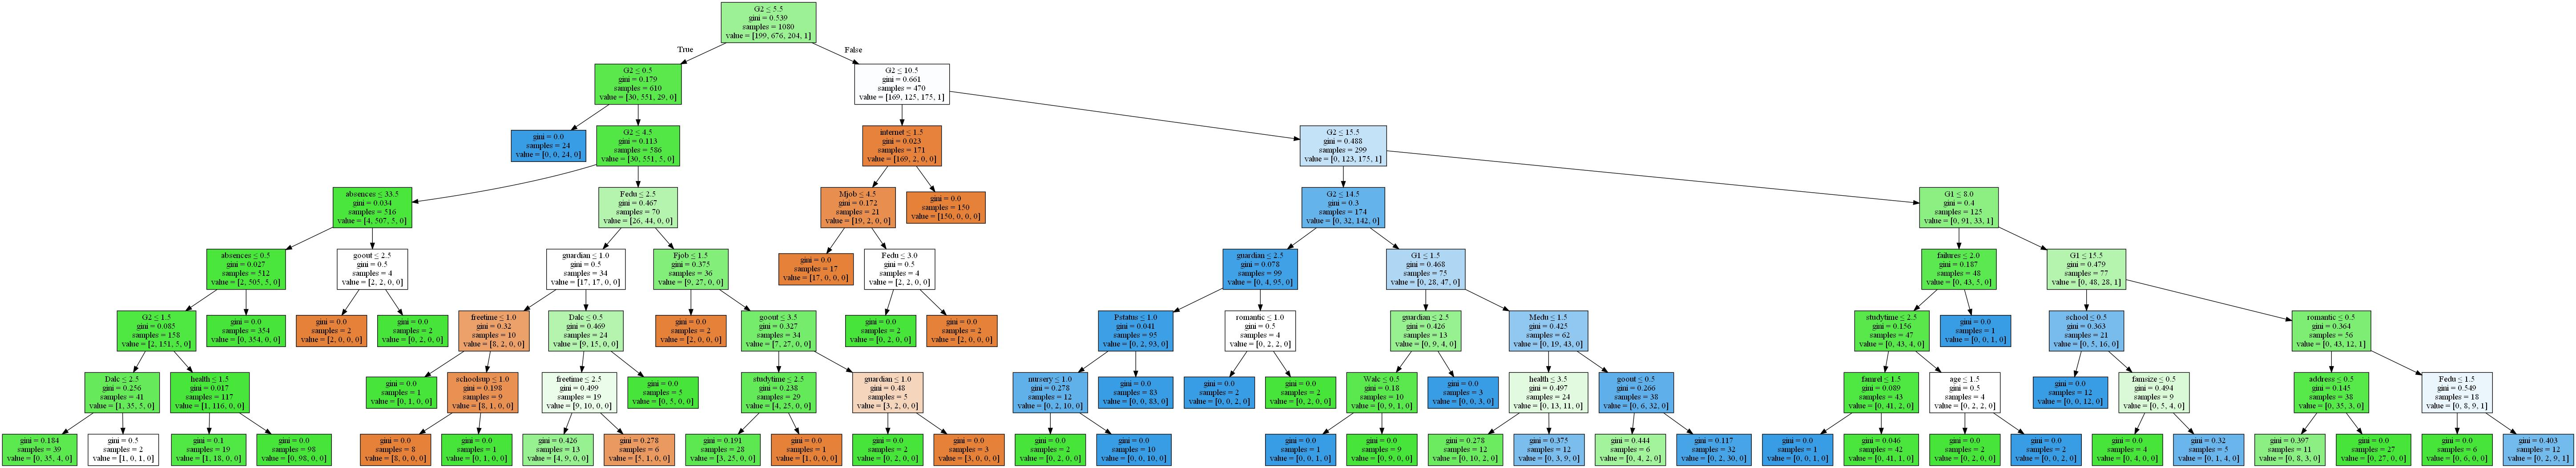

In [889]:
from IPython.display import Image
Image(filename='deci_tree.jpg', width=1000)

## Changing the max_depth

In [898]:
train_depth_accuracy=[]
test_depth_accuracy=[]
for depth in range(1,10):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    # fit the model
    clf_gini.fit(X_train, y_train)
    y_pred_test_gini = clf_gini.predict(X_test)   
    test_depth_accuracy.append(accuracy_score(y_test, y_pred_test_gini))
    
    y_pred_train_gini = clf_gini.predict(X_train)   
    train_depth_accuracy.append(accuracy_score(y_train, y_pred_train_gini))


In [899]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_depth_accuracy,'test_acc':test_depth_accuracy})

In [900]:
frame.head()

,max_depth,train_acc,test_acc
0,1,0.672222,0.614958
1,2,0.850926,0.806094
2,3,0.904630,0.806094
3,4,0.904630,0.814404
4,5,0.931481,0.839335


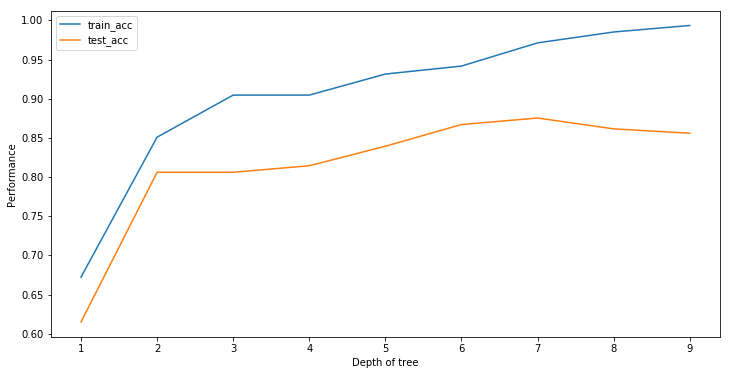

In [901]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'])
plt.plot(frame['max_depth'],frame['test_acc'])
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()